In [10]:
# block 1: import of all useful libraries and the data file used
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 
import datetime as dt
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

In [11]:
# block 2: creation of different variables uses 
# Assignment for each variable of data coming from the file import (data of the type ndarrays)
data_U = data['U']
data_V = data['V']
data_depthV = data['depthV']
data_t = data['t']
data_timeDV = data['timeDV']                                          
data_u25 = data['u25']                            
data_u55 = data['u55']
data_u90 = data['u90']
data_v25 = data['v25']
data_v55 = data['v55']
data_v90 = data['v90']
meander = data['M']
jetspeed = data['Q']

In [12]:
# block 3: Conversion of Matlab time data to 'classic python time data.
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                         
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac

In [13]:
# block 4: Creation of time and power variables
# Convert Matlab variable "t" into list of python datetime objects
# Creation of the variable P (Power density of the current).
# Converting unit W to kW for power
t = data_t[0,:]
py_t = [matlab2datetime(tval) for tval in t]
V = (data_U*data_U) + (data_V*data_V)
Vf = np.sqrt(V)                        
P = 0.5 * 1025 * 4 * (Vf*Vf*Vf)    
Pf = P/1000

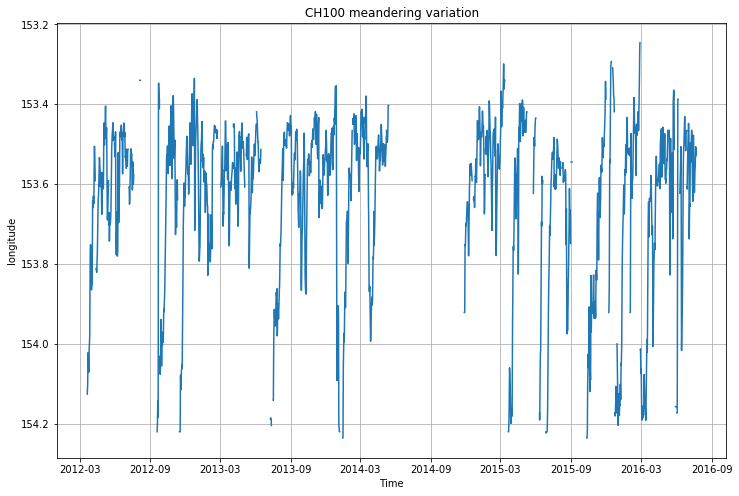

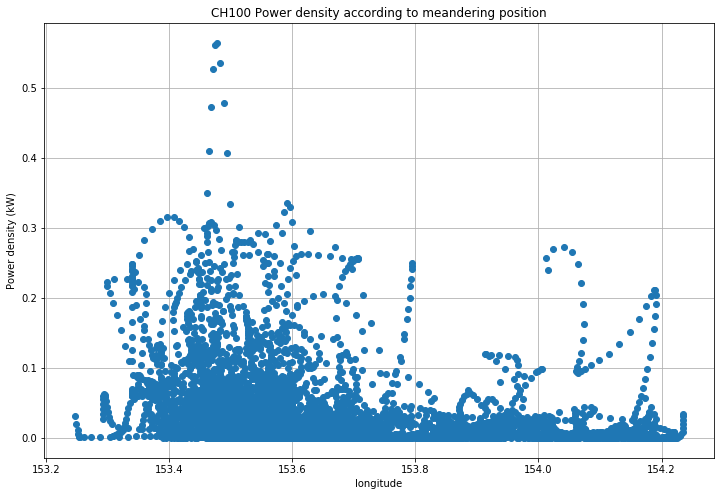

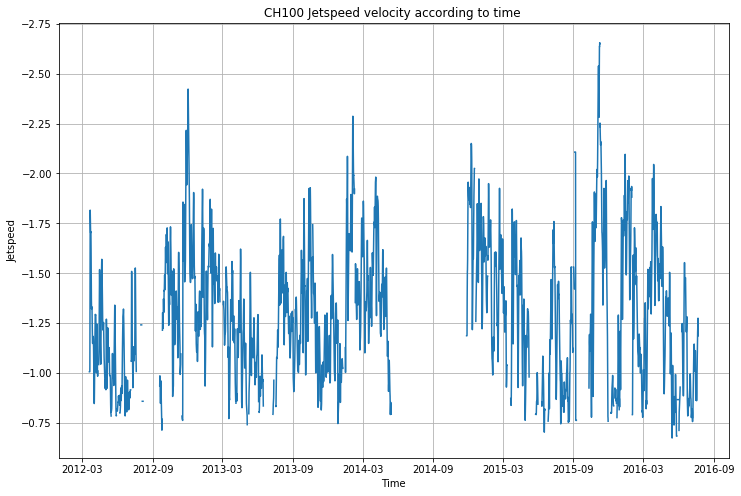

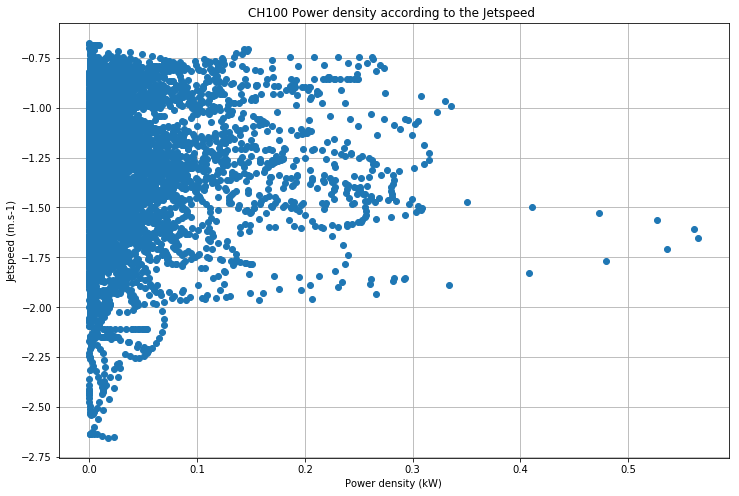

In [14]:
# block 5: Creation of the different graph 

#Graph 1 ; plot the variables py_t and meander.
t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (12,8) 
plt.plot(py_t,meander[0,:])
plt.xlabel("Time")             
plt.ylabel("longitude")
plt.gca().invert_yaxis()
plt.title("CH100 meandering variation")
plt.grid(True)                       
plt.show()

#Graph 2 ; plot the variables meander and Pf.

t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (12,8) 
plt.plot(meander[0,:],Pf[0,:],'o')
plt.xlabel("longitude")             
plt.ylabel("Power density (kW)")
plt.title("CH100 Power density according to meandering position")
plt.grid(True)                       
plt.show()

#Graph 3 ; plot the variables py_t and jetspeed
t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (12,8) 
plt.plot(py_t,jetspeed[:,0])
plt.xlabel("Time")             
plt.ylabel("Jetspeed")
plt.gca().invert_yaxis()
plt.title("CH100 Jetspeed velocity according to time ")
plt.grid(True)                       
plt.show()

#Graph 4 ; plot the variables Pf and jetspeed
t = data_t[0,:]               
plt.rcParams['figure.figsize'] = (12,8) 
plt.plot(Pf[0,:],jetspeed[:,0],'o')
plt.xlabel("Power density (kW)")             
plt.ylabel("Jetspeed (m.s-1)")
plt.title("CH100 Power density according to the Jetspeed ")
plt.grid(True)                       
plt.show()